# Before your start:

    Read the README.md file
    Comment as much as you can and use the resources (README.md file)
    Happy learning!

In this exercise, we  will generate random numbers from the continuous disributions we learned in the lesson. There are two ways to generate random numbers:

1. Using the numpy library 
1. using the Scipy library 

Use either or both of the lbraries in this exercise.

## Uniform Distribution

To generate uniform random numbers between any two given values using scipy, we can either use the following code or the code that we have
discussed in class:

In [1]:
from scipy.stats import uniform
x = uniform.rvs(size=10)
a = 2
b = 3
randoms  = a + (b-a)*x
print(randoms)

[2.17630552 2.99704002 2.88446672 2.28465523 2.00081836 2.75375272
 2.29591531 2.50565061 2.78106688 2.97692828]


**Your task:**

1. Based on the code above, write a function that generates uniformly distributed random numbers. There are several requirements for your function:
    * It should accept 3 parameters: 
        * `bottom` - the lower boundary of the generated numbers
        * `ceiling` - the upper boundary of the generated numbers
        * `count` - how many numbers to generate
    * It should return an array of uniformly distributed random numbers

1. Call your function with 2 sets of params below:
    * bottom=10, ceiling=15, count=100
    * bottom=10, ceiling=60, count=1,000

1. Plot the uniform distributions generated above using histograms, where x axis is the value and y axis is the count. Let the histogram's number of bins be 10.

Your output should look like below:

![uniform distribution](ud.png)

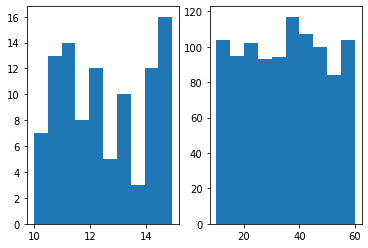

In [2]:
# your code here

import matplotlib.pyplot as plt

def uni (bottom,ceilling,count):
    x=uniform.rvs(size=count)
    
    return bottom + (ceilling-bottom)*x


_,(char1,char2)=plt.subplots(ncols=2,nrows=1)
char1.hist(uni(10,15,100))
char2.hist(uni(10,60,1000))
plt.show()

How are the two distributions different?

In [3]:
# your answer here:

""" They are different in a way that one has many more elements than the other, 100 vs 1000, and the range of values is also different, 10-15 vs 10-60 """

' They are different in a way that one has many more elements than the other, 100 vs 1000, and the range of values is also different, 10-15 vs 10-60 '

## Normal Distribution

1. In the same way in the Uniform Distribution challenge, write a function that generates normally distributed random numbers.
1. Generate 1,000 normally distributed numbers with the average of 10 and standard deviation of 1
1. Generate 1,000 normally distributed numbers with the average of 10 and standard deviation of 50
2. Plot the distributions of the data generated.

Expected output:

![normal distribution](nd.png)

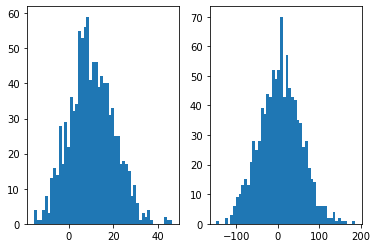

In [4]:
# your code here
import numpy as np

data1=10+np.random.randn(1000)*10
data2=10+np.random.randn(1000)*50


_,(char1,char2)=plt.subplots(ncols=2,nrows=1)
char1.hist(data1,bins=50)
char2.hist(data2,bins=50)
plt.show()

How are the two distributions different?

In [5]:
# your answer here:

""" Distribution 1 is much more concentrated around the mean (lower variance) and the other is more dispersed around the mean. """


' Distribution 1 is much more concentrated around the mean (lower variance) and the other is more dispersed around the mean. '

## Normal Distribution of Real Data

In this challenge we are going to take a look the real data. We will use vehicles.csv file for this exercise

First import vehicles.csv.
Then plot the histograms for the following variables:

1. Fuel Barrels/Year

In [6]:
import pandas as pd

vehicles=pd.read_csv("vehicles.csv")

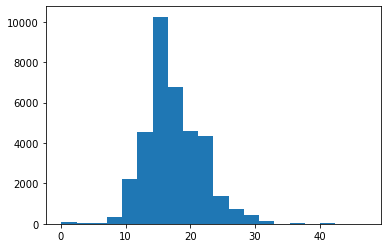

In [7]:
# your code here

plt.hist(vehicles["Fuel Barrels/Year"],bins=20)
plt.show()

2. CO2 Emission Grams/Mile 

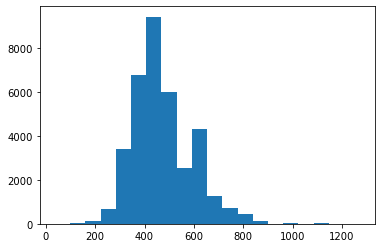

In [8]:
# your code here

plt.hist(vehicles["CO2 Emission Grams/Mile"],bins=20)
plt.show()

3. Combined MPG

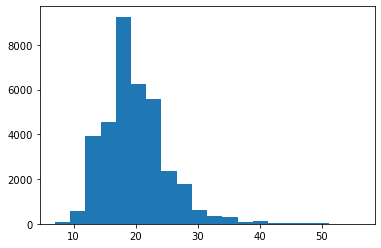

In [9]:
plt.hist(vehicles["Combined MPG"],bins=20)
plt.show()

Which one(s) of the variables are nearly normally distributed? How do you know?

In [10]:
condition=(vehicles["Fuel Barrels/Year"].mean()-vehicles["Fuel Barrels/Year"].std()< vehicles["Fuel Barrels/Year"]) & (vehicles["Fuel Barrels/Year"]<vehicles["Fuel Barrels/Year"].mean()+vehicles["Fuel Barrels/Year"].std())

print(len(vehicles[condition])/len(vehicles))

condition2=(vehicles["CO2 Emission Grams/Mile"].mean()-vehicles["CO2 Emission Grams/Mile"].std()< vehicles["CO2 Emission Grams/Mile"]) & (vehicles["CO2 Emission Grams/Mile"]<vehicles["CO2 Emission Grams/Mile"].mean()+vehicles["CO2 Emission Grams/Mile"].std())

print(len(vehicles[condition2])/len(vehicles))

condition3=(vehicles["Combined MPG"].mean()-vehicles["Combined MPG"].std()< vehicles["Combined MPG"]) & (vehicles["Combined MPG"]<vehicles["Combined MPG"].mean()+vehicles["Combined MPG"].std())

print(len(vehicles[condition3])/len(vehicles))

0.7444370271473075
0.7117823765020027
0.7491377392078327


In [11]:
print(vehicles["Fuel Barrels/Year"].mean(),vehicles["Fuel Barrels/Year"].median(),vehicles["Fuel Barrels/Year"].std())
print(vehicles["CO2 Emission Grams/Mile"].mean(),vehicles["CO2 Emission Grams/Mile"].median(),vehicles["CO2 Emission Grams/Mile"].std())
print(vehicles["Combined MPG"].mean(),vehicles["Combined MPG"].median(),vehicles["Combined MPG"].std())

17.609055502328875 17.347894736842107 4.467282686296995
475.31633925715045 467.7368421052632 119.06077323591474
19.92932242990654 19.0 5.112408944666006


In [12]:
""" None of them is near a normal. A normal distribution should have mean=median and 68% of results between +/- 1 std dev.

None of the distributions follows these conditions"""

' None of them is near a normal. A normal distribution should have mean=median and 68% of results between +/- 1 std dev.\n\nNone of the distributions follows these conditions'

## Exponential Distribution

1. Using `numpy.random.exponential`, create a function that returns a list of numbers exponentially distributed with the mean of 10. 

1. Use the function to generate two number sequences with a mean of 1 and 100 and a size of 1000.

1. Plot the distributions as histograms with the number of bins as 100.

Your output should look like below:

![exponential distribution](ed.png)

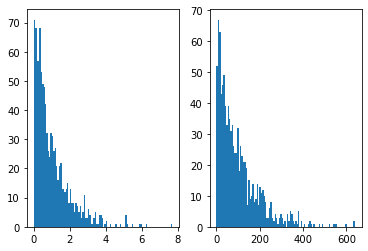

In [13]:
# your code here

_,(char1,char2)=plt.subplots(nrows=1,ncols=2)
char1.hist(np.random.exponential(scale=1,size=1000),bins=100)
char2.hist(np.random.exponential(scale=100,size=1000),bins=100)
plt.show()


How are the two distributions different?

In [14]:
# your answer here:

""" Shape of the two functions is pretty simmilar, the values they take are different  """


## Exponential Distribution of Real Data

Suppose that the amount of time one spends in a bank is exponentially distributed with mean as 10 minutes (i.e. λ = 1/10). What is the probability that a customer will spend less than fifteen minutes in the bank? 

Write a code in python to solve this problem

In [26]:
# your answer here
# Hint: This is same as saying P(x<15)

from scipy.stats import expon

expon_dist=expon(scale=10)

expon_dist.cdf(5)

0.3934693402873666

What is the probability that the customer will spend more than 15 minutes

In [27]:
# your answer here

1-expon_dist.cdf(15)


0.2231301601484298